In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

## 一般模式

In [9]:
path = './data/'
#准备数据 数据下载在xgboost的github上 /demo/data/
dtrain = xgb.DMatrix(path+'agaricus.txt.train')
dtest = xgb.DMatrix(path+'agaricus.txt.test')
#准备参数
param = {'max_depth':2,'eta':1,'silent':0,'objective':'binary:logistic'}
#参数说明
'''
max_depth:树的最大深度 缺省值为6 取值范围[1,+无穷]
eta:防止过拟合在更新的时候使用的收缩步长 缺省值为0.3 取值[0,1] 其实就是学习率
silent:0表示运行时打印运行信息，1表示不打印运行信息 缺省值为0
objective:定义学习任务和学习目标 binary:logistic表示二分类逻辑回归 输出为概率
'''
#设置Boosting的迭代轮数 也就是最后会用到多少颗树
num_round = 3
#训练
bst = xgb.train(param,dtrain,num_round)

def evaluate(data,model):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    y = data.get_label()
    acc = accuracy_score(y,pre_res)
    return acc

acc_train = evaluate(dtrain,bst)
acc_test = evaluate(dtest,bst)
print(acc_train)
print(acc_test)

# 0.9777368340242591
# 0.978274363749224

# #训练结束之后进行预测（在训练样本上）
# pre_train = bst.predict(dtrain)
# #得到预测结果
# train_pre = [round(res_train) for res_train in pre_train]
# #获取样本标签
# y_train = dtrain.get_label()
# acc_train = accuracy_score(y_train,train_pre)
# print(acc_train)

# #训练结束之后进行预测（在测试样本上)
# pre_test = bst.predict(dtest)
# test_pre = [round(res_test) for res_test in pre_test]
# y_test = dtest.get_label()
# acc_test = accuracy_score(y_test,test_pre)
# print(acc_test)



[17:10:22] 6513x127 matrix with 143286 entries loaded from ./data/agaricus.txt.train
[17:10:22] 1611x127 matrix with 35442 entries loaded from ./data/agaricus.txt.test
0.9929372025180409
0.9937926753569212


## 模型可视化

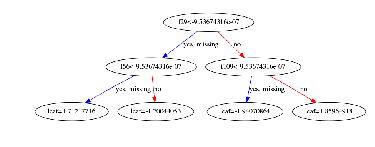

'\n第一个参数为训练好的模型 第二个参数是要打印的树的索引，从0开始 第三个参数是打印的格式\n'

In [10]:
#模型可视化
from xgboost import plot_tree
import matplotlib.pyplot as plt
xgb.plot_tree(bst,num_trees=0,rankdir='TD')
plt.show()
'''
第一个参数为训练好的模型 第二个参数是要打印的树的索引，从0开始 第三个参数是打印的格式
'''

## xgboost和sklearn结合 fit predict方式

In [11]:
from sklearn.datasets import load_svmlight_file
num_round = 2
path = './data/'
X_train,y_train = load_svmlight_file(path+'agaricus.txt.train')#xgboost支持libsvm格式的文件
X_test,y_test = load_svmlight_file(path+'agaricus.txt.test')

def evaluate_sklearn(data,model,label):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    acc = accuracy_score(label,pre_res)
    return acc

bst = XGBClassifier(max_depth=2,learning_rate=1,n_estimators=num_round,silent=True,objective='binary:logistic')
'''
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
'''
bst.fit(X_train,y_train)
acc_train2 = evaluate_sklearn(X_train,bst,y_train)
print(acc_train2)
#print(acc_test2)
#0.9777368340242591
#0.9929372025180409

0.9777368340242591


## train_test_split 将训练集划分为train_set和dev_set

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
path = './data/'
num_round = 3
X_train,y_train = load_svmlight_file(path+'agaricus.txt.train')
X_test,y_test = load_svmlight_file(path+'agaricus.txt.test')

X_train_apart,X_dev_apart,y_train_apart,y_dev_apart = train_test_split(X_train,y_train,test_size = 0.33,random_state = 2333)

def evaluate_sklearn(data,model,label):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    acc = accuracy_score(label,pre_res)
    return acc

bst = XGBClassifier(max_depth=2,learning_rate=1,n_estimators=num_round,silent=True,objective='binary:logistic')
bst.fit(X_train_apart,y_train_apart)

print(evaluate_sklearn(X_dev_apart,bst,y_dev_apart))

#0.9925581395348837  num_round=3 

0.9925581395348837


## 学习曲线

[0]	validation_0-error:0.046528	validation_0-logloss:0.233576	validation_1-error:0.046512	validation_1-logloss:0.234042
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.022003	validation_0-logloss:0.137507	validation_1-error:0.022791	validation_1-logloss:0.13582
[2]	validation_0-error:0.006876	validation_0-logloss:0.082731	validation_1-error:0.007442	validation_1-logloss:0.083814
[3]	validation_0-error:0.015127	validation_0-logloss:0.056502	validation_1-error:0.015349	validation_1-logloss:0.057887
[4]	validation_0-error:0.006876	validation_0-logloss:0.041372	validation_1-error:0.007442	validation_1-logloss:0.04389
[5]	validation_0-error:0.001146	validation_0-logloss:0.027251	validation_1-error:0.001395	validation_1-logloss:0.029045
[6]	validation_0-error:0.001146	validation_0-logloss:0.01632	validation_1-error:0.001395	validation_1-logloss:0.01748

[74]	validation_0-error:0	validation_0-logloss:0.000663	validation_1-error:0	validation_1-logloss:0.000741
[75]	validation_0-error:0	validation_0-logloss:0.000662	validation_1-error:0	validation_1-logloss:0.000739
[76]	validation_0-error:0	validation_0-logloss:0.000661	validation_1-error:0	validation_1-logloss:0.000737
[77]	validation_0-error:0	validation_0-logloss:0.00066	validation_1-error:0	validation_1-logloss:0.000736
[78]	validation_0-error:0	validation_0-logloss:0.000659	validation_1-error:0	validation_1-logloss:0.000734
[79]	validation_0-error:0	validation_0-logloss:0.000658	validation_1-error:0	validation_1-logloss:0.000734
[80]	validation_0-error:0	validation_0-logloss:0.000657	validation_1-error:0	validation_1-logloss:0.000733
[81]	validation_0-error:0	validation_0-logloss:0.000657	validation_1-error:0	validation_1-logloss:0.000731
[82]	validation_0-error:0	validation_0-logloss:0.000656	validation_1-error:0	validation_1-logloss:0.000731
[83]	validation_0-error:0	validation_0

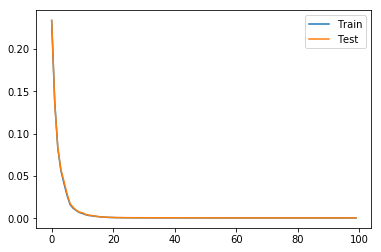

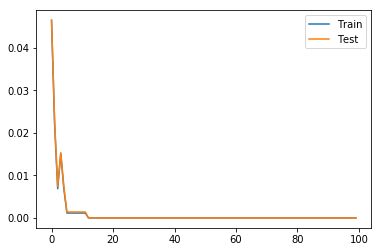

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
path = './data/'
num_round = 100
X_train,y_train = load_svmlight_file(path+'agaricus.txt.train')
X_test,y_test = load_svmlight_file(path+'agaricus.txt.test')

X_train_apart,X_dev_apart,y_train_apart,y_dev_apart = train_test_split(X_train,y_train,test_size = 0.33,random_state = 2333)

def evaluate_sklearn(data,model,label):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    acc = accuracy_score(label,pre_res)
    return acc

bst = XGBClassifier(max_depth=2,learning_rate=1,n_estimators=num_round,silent=True,objective='binary:logistic')
eval_set = [(X_train_apart,y_train_apart),(X_dev_apart,y_dev_apart)]

#early_stop
bst.fit(X_train_apart,y_train_apart, early_stopping_rounds = 10,eval_metric = ['error','logloss'],eval_set = eval_set)

#bst.fit(X_train_apart,y_train_apart, eval_metric = ['error','logloss'],eval_set = eval_set)

results = bst.evals_result()
epoch = len(results['validation_0']['error'])
x_axis = range(0,epoch)#横轴表示树的个数
fig,ax = plt.subplots()
ax.plot(x_axis,results['validation_0']['logloss'],label='Train')
ax.plot(x_axis,results['validation_1']['logloss'],label='Test')
ax.legend()
plt.ylabel = ('Log loss')
plt.title= ('XGBoost Log loss')
plt.show()


fig,ax = plt.subplots()
ax.plot(x_axis,results['validation_0']['error'],label='Train')
ax.plot(x_axis,results['validation_1']['error'],label='Test')
ax.legend()
plt.ylabel = ('error')
plt.title= ('XGBoost error')
plt.show()

## K折交叉验证

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

path = './data/'
num_round = 100
X_train,y_train = load_svmlight_file(path+'agaricus.txt.train')
X_test,y_test = load_svmlight_file(path+'agaricus.txt.test')

X_train_apart,X_dev_apart,y_train_apart,y_dev_apart = train_test_split(X_train,y_train,test_size = 0.33,random_state = 2333)

def evaluate_sklearn(data,model,label):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    acc = accuracy_score(label,pre_res)
    return acc

bst = XGBClassifier(max_depth=2,learning_rate=1,n_estimators=num_round,silent=True,objective='binary:logistic')

#early_stop
bst.fit(X_train_apart,y_train_apart)

kfold = StratifiedKFold(n_splits=10,random_state=2333)
results = cross_val_score(bst,X_train,y_train,cv = kfold)

print(results)
print('CV ACC: %.2f%% (%.2f%%)' % (results.mean()*100,results.std()*100))

[0.69478528 1.         1.         1.         1.         1.
 1.         1.         0.8156682  1.        ]
CV ACC: 95.10% (10.16%)


## GridSearch CV

In [18]:
import sklearn
from sklearn.model_selection import GridSearchCV
path = './data/'
num_round = 100
X_train,y_train = load_svmlight_file(path+'agaricus.txt.train')
X_test,y_test = load_svmlight_file(path+'agaricus.txt.test')

X_train_apart,X_dev_apart,y_train_apart,y_dev_apart = train_test_split(X_train,y_train,test_size = 0.33,random_state = 2333)

def evaluate_sklearn(data,model,label):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    acc = accuracy_score(label,pre_res)
    return acc

bst = XGBClassifier(max_depth=2,learning_rate=1,n_estimators=num_round,silent=True,objective='binary:logistic')
#设置Boosting迭代计算次数
param_test = {'n_estimator':range(1,50,1)}
clf = GridSearchCV(estimator=bst,param_grid=param_test,scoring='accuracy',cv = 5)
clf.fit(X_train,y_train)
#clf.best_params_,clf.best_score_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimator': range(1, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

## 测试

In [17]:
def evaluate_sklearn(data,model,label):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    acc = accuracy_score(label,pre_res)
    return acc

print(evaluate_sklearn(X_test,clf,y_test))

1.0
